In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df=df.drop(['Unnamed: 0','year','month'],axis=1)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


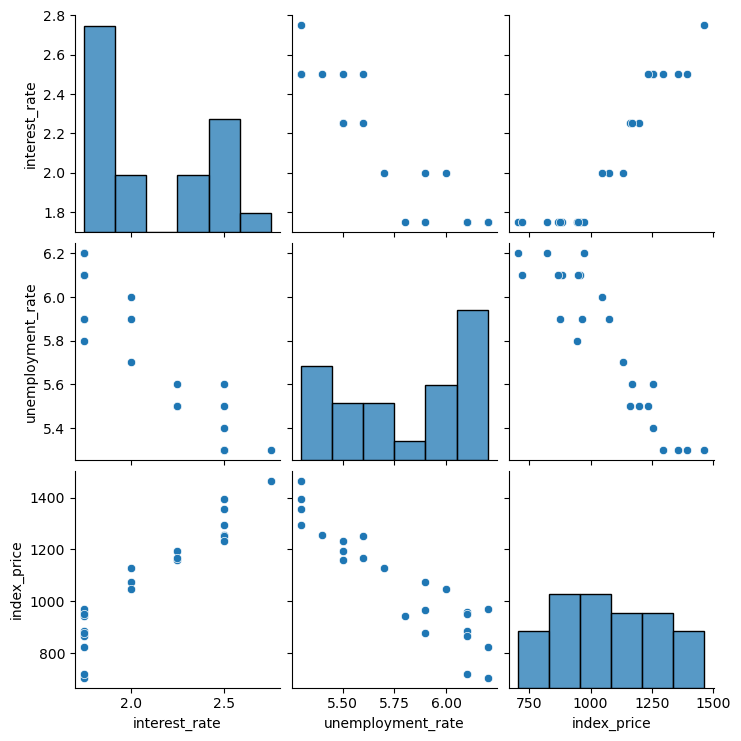

In [7]:
sns.pairplot(df)

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

**APPLYING LINEAR REGRESSION**

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regression=LinearRegression()

In [16]:
regression.fit(X_train,y_train)

LinearRegression()

In [45]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
print(np.mean(validation_score))

-7488.7685414317275


In [17]:
y_pred=regression.predict(X_test)

In [18]:
y_test

14     943
13     965
15     958
11    1075
18     884
5     1254
Name: index_price, dtype: int64

In [19]:
y_pred

array([1056.35419596, 1008.7943151 ,  913.67455338, 1129.18617579,
        913.67455338, 1512.64953974])

In [47]:
import statsmodels.api as sm

In [49]:
model=sm.OLS(y_train,X_train).fit()

In [51]:
prediction=model.predict(X_test)

In [53]:
model.summary()

D:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.037
Model:                            OLS   Adj. R-squared (uncentered):             -0.084
Method:                 Least Squares   F-statistic:                             0.3049
Date:                Mon, 10 Jun 2024   Prob (F-statistic):                       0.741
Time:                        14:17:28   Log-Likelihood:                         -151.45
No. Observations:                  18   AIC:                                      306.9
Df Residuals:                      16   BIC:                                      308.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           133.0982    897.763      0.148      0.884   -1770.075    2036.271
x2           -82.3761    897.763     -0.092      0.928   -1985.549    1820.797
==============================================================================
Omnibus:                        0.165   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.174
Skew:                          -0.167   Prob(JB):                        0.917
Kurtosis:                       2.653   Cond. No.                         6.43
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
regression.coef_

array([133.09820991, -82.37613005])